In [36]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# 1.) Clean the Apple Data to get a quarterly series of EPS.

In [4]:
y = pd.read_csv("AAPL_quarterly_financials.csv")

In [5]:
y.index = y.name

In [6]:
y = pd.DataFrame(y.loc["BasicEPS", :]).iloc[2:,:]

In [7]:
y.index = pd.to_datetime(y.index)

In [8]:
# CHECK IF NAS ARE NO DIVIDEND PERIOD
y = y.sort_index().fillna(0.)

# 2.) Come up with 6 search terms you think could nowcast earnings. (Different than the ones I used) Add in 3 terms that that you think will not Nowcast earnings. Pull in the gtrends data

In [9]:
from pytrends.request import TrendReq

In [48]:
# Create pytrends object
pytrends = TrendReq(hl='en-US', tz=360)

# Set up the keywords and the timeframe
keywords = ["Mobile Phone Battery", "Huawei", "IOS", "Airpods", "MacBook", "Apple care", "USC", "NBA", "Bear"]  # Add your keywords here
start_date = '2004-01-01'
end_date = '2024-01-01'

# Create an empty DataFrame to store the results
df = pd.DataFrame()

# Iterate through keywords and fetch data
for keyword in keywords:
    time.sleep(5)
    pytrends.build_payload([keyword], cat=0, timeframe=f'{start_date} {end_date}', geo='', gprop='')
    interest_over_time_df = pytrends.interest_over_time()
    df[keyword] = interest_over_time_df[keyword]

In [49]:
df = df.resample("Q").mean()

In [50]:
# ALIGN DATA
X = df
temp = pd.concat([y, X],axis = 1).dropna()
y = temp[["BasicEPS"]].copy()
X = temp.iloc[:,1:].copy()

# 3.) Normalize all the X data

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4.) Run a Lasso with lambda of .5. Plot a bar chart.

In [62]:
from sklearn.linear_model import Lasso

In [76]:
lasso = Lasso(alpha = 0.5)

In [77]:
lasso.fit(X_scaled, y)

Lasso(alpha=0.5)

In [78]:
coefficients = lasso.coef_

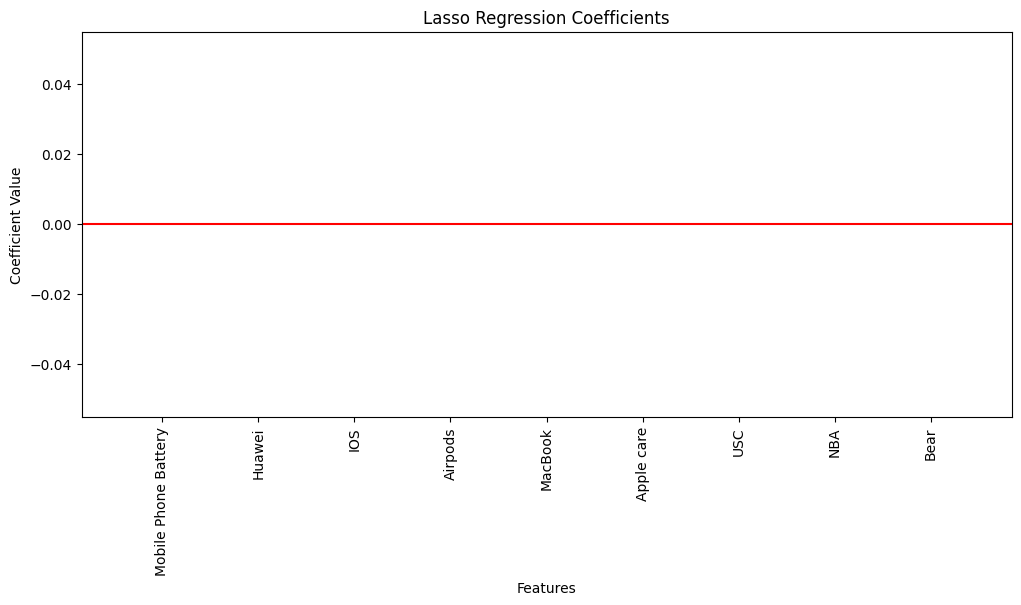

In [79]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

# Assuming 'coefficients' is a list or array of coefficient values
# and 'X.columns' is a list or array of feature names

# Create bar plot
plt.bar(range(len(coefficients)), coefficients)

# Add red horizontal line at y=0
plt.axhline(0, color="red")

# Set the tick labels on the x-axis to be the column names
plt.xticks(range(len(coefficients)), X.columns, rotation='vertical')

# Optional: Add labels and title
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Lasso Regression Coefficients')

plt.show()


# 5.) Do these coefficient magnitudes make sense?

It does not make any sense by just looking at the graph because we can see that all the betas all zero even including the predictors we think that could be related to the company's performance. However, by thinking of the formula for lass, it does make some senses because we will have a high penalty given the lambda as 0.5, so we possibly have all zero betas. 